# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='/home/corey/reinforcement-learning/udacity/deep-reinforcement-learning/p2_continuous-control/Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
timesteps = 0
while True:
    print(timesteps)
    timesteps += 1
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
print(actions)
actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
env_info = env.step(actions)[brain_name]           # send all actions to tne environment
next_states = env_info.vector_observations         # get next state (for each agent)
print(next_states)
rewards = env_info.rewards                         # get reward (for each agent)
print(rewards)
dones = env_info.local_done                        # see if episode finished
print(dones)
scores += env_info.rewards                         # update the score (for each agent)
states = next_states                               # roll over states to next time step
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

[[-2.12364997  0.64665414 -0.10226352 -1.71593445]]
[[ 1.73896790e-01 -3.99621177e+00  7.66600221e-02  9.99720573e-01
   2.16301307e-02 -1.73913722e-04  9.53863375e-03 -3.79417539e-01
   9.88434069e-03  8.58980536e-01  3.45250154e+00  1.07755415e-01
   1.52375340e+00  5.72452545e-02 -9.98504162e+00  6.63154200e-02
   9.99092102e-01 -4.10641953e-02 -1.14788534e-03 -1.12874955e-02
   4.49574560e-01  6.56525344e-02 -1.63159597e+00 -1.23654044e+00
   5.75772882e-01  6.74469352e-01  7.87358952e+00 -1.00000000e+00
   1.41654050e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  -2.99753308e-01]]
[0.0]
[False]
Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

In [ ]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
env_info = env.reset(train_mode=True)[brain_name]

In [6]:
agent = Agent(state_size=33, action_size=4, random_seed=2)
# number of agents: 1
# Size of each action: 4
# There are 1 agents. Each observes a state with length: 33
# The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
#   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#   0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
#   1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
#   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#   0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
#   5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
#  -1.68164849e-01]

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: coreymorris. Use `wandb login --relogin` to force relogin


In [7]:
def ddpg(n_episodes=1000, max_t=30_000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        # state = env.reset()
        # state = env_info.vector_observations[0] #TODO this might need to change
        state = env_info.vector_observations
        agent.reset()
        score = 0
        # timesteps = 0
        for t in range(max_t):
            # timesteps += 1
            actions = agent.act(state)
            actions = np.clip(actions, -1, 1)
            # next_state, reward, done, _ = env.step(actions)
            env_info = env.step(actions)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]                         # get reward (for each agent)
            done = env_info.local_done[0]  
            agent.step(state, actions, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f} .Last Score{}'.format(i_episode, np.mean(scores_deque), score), end="")
        # print(f"Score last episode: {score}")
        # print(f"timesteps this episode: {timesteps}")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores


Episode 100	Average Score: 0.18
Episode 200	Average Score: 0.29
Episode 300	Average Score: 0.30
Episode 400	Average Score: 0.32
Episode 500	Average Score: 0.38
Episode 600	Average Score: 0.33
Episode 700	Average Score: 0.21
Episode 800	Average Score: 0.24
Episode 900	Average Score: 0.27
Episode 1000	Average Score: 0.23


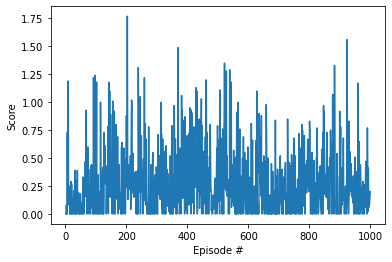

In [17]:
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Experiment 2 . DDPG with bipedal parameters
Parameter differences
* Increased buffer size
* added weight decay

/home/corey/anaconda3/envs/drlnd_fresh/lib/python3.6/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 0.17
Episode 200	Average Score: 0.26
Episode 300	Average Score: 0.27
Episode 400	Average Score: 0.30
Episode 500	Average Score: 0.24
Episode 600	Average Score: 0.24
Episode 700	Average Score: 0.22
Episode 800	Average Score: 0.37
Episode 900	Average Score: 0.30
Episode 1000	Average Score: 0.28


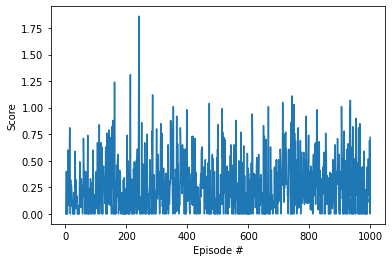

In [10]:
# Using bipedel parameters
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [10]:
# Using bipedel parameters with a much larger timestep limit
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

/home/corey/anaconda3/envs/drlnd_fresh/lib/python3.6/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1	Average Score: 0.42timesteps this episode: 1001
Episode 2	Average Score: 0.66timesteps this episode: 1001
Episode 3	Average Score: 0.57timesteps this episode: 1001
Episode 4	Average Score: 0.43timesteps this episode: 1001
Episode 5	Average Score: 0.34timesteps this episode: 1001
Episode 6	Average Score: 0.29timesteps this episode: 1001
Episode 7	Average Score: 0.25timesteps this episode: 1001
Episode 8	Average Score: 0.21timesteps this episode: 1001
Episode 9	Average Score: 0.21timesteps this episode: 1001
Episode 10	Average Score: 0.18timesteps this episode: 1001
Episode 11	Average Score: 0.17timesteps this episode: 1001
Episode 12	Average Score: 0.15timesteps this episode: 1001
Episode 13	Average Score: 0.14timesteps this episode: 1001
Episode 14	Average Score: 0.13timesteps this episode: 1001
Episode 15	Average Score: 0.12timesteps this episode: 1001
Episode 16	Average Score: 0.20timesteps this episode: 1001
Episode 17	Average Score: 0.24timesteps this episode: 1001
Episod

KeyboardInterrupt: 

In [ ]:
# params from rl baselines zoo
# BipedalWalker-v3:
#   n_timesteps: !!float 1e6
#   policy: 'MlpPolicy'
#   gamma: 0.98
#   buffer_size: 200000
#   learning_starts: 10000
#   noise_type: 'normal'
#   noise_std: 0.1
#   gradient_steps: -1
#   train_freq: [1, "episode"]
#   learning_rate: !!float 1e-3
#   policy_kwargs: "dict(net_arch=[400, 300])"

In [8]:
# Using bipedel parameters . some from rl baselines zoo
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

/home/corey/anaconda3/envs/drlnd_fresh/lib/python3.6/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1	Average Score: 0.00timesteps this episode: 1001
Episode 2	Average Score: 0.00timesteps this episode: 1001
Episode 3	Average Score: 0.00timesteps this episode: 1001
Episode 4	Average Score: 0.05timesteps this episode: 1001
Episode 5	Average Score: 0.06timesteps this episode: 1001
Episode 6	Average Score: 0.05timesteps this episode: 1001
Episode 7	Average Score: 0.04timesteps this episode: 1001
Episode 8	Average Score: 0.06timesteps this episode: 1001
Episode 9	Average Score: 0.05timesteps this episode: 1001
Episode 10	Average Score: 0.05timesteps this episode: 1001
Episode 11	Average Score: 0.05timesteps this episode: 1001
Episode 12	Average Score: 0.05timesteps this episode: 1001
Episode 13	Average Score: 0.04timesteps this episode: 1001
Episode 14	Average Score: 0.04timesteps this episode: 1001
Episode 15	Average Score: 0.04timesteps this episode: 1001
Episode 16	Average Score: 0.03timesteps this episode: 1001
Episode 17	Average Score: 0.03timesteps this episode: 1001
Episod

KeyboardInterrupt: 

Episode 100	Average Score: 0.63 .Last Score0.8399999812245369
Episode 200	Average Score: 0.57 .Last Score0.40999999083578587
Episode 300	Average Score: 0.60 .Last Score1.02999997697770645
Episode 400	Average Score: 0.56 .Last Score0.86999998055398467
Episode 500	Average Score: 0.63 .Last Score0.98999997787177566
Episode 600	Average Score: 0.62 .Last Score0.269999993965029734
Episode 700	Average Score: 0.65 .Last Score0.43999999016523363
Episode 800	Average Score: 0.64 .Last Score1.099999975413084474
Episode 900	Average Score: 0.62 .Last Score0.479999989271163946
Episode 1000	Average Score: 0.58 .Last Score0.35999999195337296


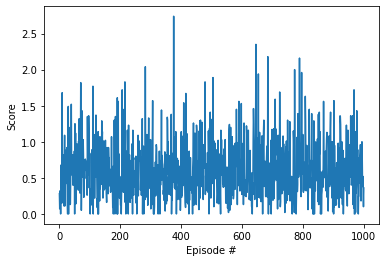

In [16]:
# ddpg with model from bipedal 
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [8]:
# ddpg with model from bipedal . just checking that it still works 
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

/home/corey/anaconda3/envs/drlnd_fresh/lib/python3.6/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 32	Average Score: 0.49 .Last Score0.08999996669590477

In [7]:
import numpy as np
import torch
import gym
import argparse
import os

import utils
import TD3
import wandb

In [11]:



# Runs policy for X episodes and returns average reward
# A fixed seed is used for the eval environment
def eval_policy(policy, env_name, seed, eval_episodes=10):
	eval_env = gym.make(env_name)
	eval_env.seed(seed + 100)

	avg_reward = 0.
	for _ in range(eval_episodes):
		state, done = eval_env.reset(), False
		while not done:
			action = policy.select_action(np.array(state))
			state, reward, done, _ = eval_env.step(action)
			avg_reward += reward

	avg_reward /= eval_episodes
    # eval_string_label = f"Evaluation over {eval_episodes} episodes"
    # wandb.log({eval_string_label: avg_reward})
	print("---------------------------------------")
	print(f"Evaluation over {eval_episodes} episodes: {avg_reward:.3f}")
	print("---------------------------------------")
	return avg_reward


	
policy ="TD3"                 # Policy name (TD3, DDPG or OurDDPG)
env_name = "BipedalWalker-v3"          # OpenAI gym environment name
seed = 0               # Sets Gym, PyTorch and Numpy seeds
start_timesteps = 25e3# Time steps initial random policy is used
eval_freq = 5e3      # How often (time steps) we evaluate
max_timesteps = int(1e6)   # Max time steps to run environment
expl_noise = 0.1              # Std of Gaussian exploration noise
batch_size = 256      # Batch size for both actor and critic
discount = 0.99                 # Discount factor
tau = 0.005                     # Target network update rate
policy_noise = 0.2              # Noise added to target policy during critic update
noise_clip = 0.5                # Range to clip target policy noise
policy_freq = 2       # Frequency of delayed policy updates
save_model = True        # Save model and optimizer parameters
load_model = ""                # Model load file name, "" doesn't load, "default" uses file_name

wandb.init(project="Continuous-Control")

wandb.config = {
    "policy": policy,
    "seed": seed, 
    "env_name": env_name,
    #TODO add the rest
}


file_name = f"{policy}_{env}_{seed}"
print("---------------------------------------")
print(f"Policy: {policy}, Env: {env}, Seed: {seed}")
print("---------------------------------------")

if not os.path.exists("./results"):
    os.makedirs("./results")

if save_model and not os.path.exists("./models"):
    os.makedirs("./models")

env = gym.make(env_name)

# Set seeds
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)

state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0] 
max_action = float(env.action_space.high[0])

kwargs = {
    "state_dim": state_dim,
    "action_dim": action_dim,
    "max_action": max_action,
    "discount": discount,
    "tau": tau,
}

# Initialize policy
if policy == "TD3":
    # Target policy smoothing is scaled wrt the action scale
    kwargs["policy_noise"] = policy_noise * max_action
    kwargs["noise_clip"] = noise_clip * max_action
    kwargs["policy_freq"] = policy_freq
    policy = TD3.TD3(**kwargs)
elif policy == "OurDDPG":
    policy = OurDDPG.DDPG(**kwargs)
elif policy == "DDPG":
    policy = DDPG.DDPG(**kwargs)

if load_model != "":
    policy_file = file_name if load_model == "default" else load_model
    policy.load(f"./models/{policy_file}")

replay_buffer = utils.ReplayBuffer(state_dim, action_dim)

# Evaluate untrained policy
evaluations = [eval_policy(policy, env_name, seed)]

state, done = env.reset(), False
episode_reward = 0
episode_timesteps = 0
episode_num = 0

wandb.watch(policy.actor, log_freq=100)

for t in range(int(max_timesteps)):
    
    episode_timesteps += 1

    # Select action randomly or according to policy
    if t < start_timesteps:
        action = env.action_space.sample()
    else:
        action = (
            policy.select_action(np.array(state))
            + np.random.normal(0, max_action * expl_noise, size=action_dim)
        ).clip(-max_action, max_action)

    # Perform action
    next_state, reward, done, _ = env.step(action) 
    done_bool = float(done) if episode_timesteps < env._max_episode_steps else 0

    # Store data in replay buffer
    replay_buffer.add(state, action, next_state, reward, done_bool)

    state = next_state
    episode_reward += reward

    # Train agent after collecting sufficient data
    if t >= start_timesteps:
        policy.train(replay_buffer, batch_size)

    if done: 
        # +1 to account for 0 indexing. +0 on ep_timesteps since it will increment +1 even if done=True
        wandb.log({"episode number": episode_num + 1})
        wandb.log({"episode timesteps": episode_timesteps})
        wandb.log({"episode reward": episode_reward})
        wandb.log({"total timesteps": t + 1})
        
        print(f"Total T: {t+1} Episode Num: {episode_num+1} Episode T: {episode_timesteps} Reward: {episode_reward:.3f}")
        # Reset environment
        state, done = env.reset(), False
        episode_reward = 0
        episode_timesteps = 0
        episode_num += 1 

    # Evaluate episode
    if (t + 1) % eval_freq == 0:
        evaluations.append(eval_policy(policy, env_name, seed))
        np.save(f"./results/{file_name}", evaluations)
        if save_model: policy.save(f"./models/{file_name}")
wandb.finish()


---------------------------------------
Policy: TD3, Env: <TimeLimit<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<BipedalWalker<BipedalWalker-v3>>>>>>, Seed: 0
---------------------------------------


/home/corey/anaconda3/envs/drlnd_fresh/lib/python3.6/site-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/home/corey/anaconda3/envs/drlnd_fresh/lib/python3.6/site-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviou

---------------------------------------
Evaluation over 10 episodes: -3.539
---------------------------------------
Total T: 59 Episode Num: 1 Episode T: 59 Reward: -108.409
Total T: 164 Episode Num: 2 Episode T: 105 Reward: -104.383
Total T: 207 Episode Num: 3 Episode T: 43 Reward: -111.107
Total T: 303 Episode Num: 4 Episode T: 96 Reward: -125.635
Total T: 1903 Episode Num: 5 Episode T: 1600 Reward: -80.610
Total T: 1980 Episode Num: 6 Episode T: 77 Reward: -106.377
Total T: 2042 Episode Num: 7 Episode T: 62 Reward: -117.165
Total T: 2103 Episode Num: 8 Episode T: 61 Reward: -112.673
Total T: 2244 Episode Num: 9 Episode T: 141 Reward: -101.431
Total T: 2295 Episode Num: 10 Episode T: 51 Reward: -112.193
Total T: 3895 Episode Num: 11 Episode T: 1600 Reward: -81.013
---------------------------------------
Evaluation over 10 episodes: -3.539
---------------------------------------
Total T: 5495 Episode Num: 12 Episode T: 1600 Reward: -85.677
Total T: 5574 Episode Num: 13 Episode T: 79 R